# Neural Networks for Image Classification

##Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
pp = pprint.PrettyPrinter(indent=4)
import warnings
warnings.filterwarnings("ignore")

# Part 1: Neural Network from the scratch
For this part, you are not allowed to use any library other than numpy.

In this part, you will implement the forward pass and backward pass (i.e. the derivates of each
parameter wrt to the loss) with the network image uploaded.

*   The weight matrix for the hidden layer is W1 and has bias b1.
*   The weight matrix for the output layer is W2 and has bias b2.
*   Activation function is sigmoid for both hidden and output layer
*   Loss function is the Mean Squared Error (MSE) loss

Refer to the below dictionary for dimensions for each matrix


In [2]:
np.random.seed(0) # don't change this
weights = {
'W1': np.random.randn(3, 2),
'b1': np.zeros(3),
'W2': np.random.randn(3),
'b2': 0,
}
X = np.random.rand(1000,2)
Y = np.random.randint(low=0, high=2, size=(1000,))

In [3]:
#Sigmoid Function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [4]:
#Implement the forward pass - Z2 and Y
def forward_propagation(X, weights):
    # Z1 -> output of the hidden layer before applying activation
    # H -> output of the  hidden layer after applying activation
    # Z2 -> output of the final layer before applying activation
    # Y -> output of the final layer after applying activation

    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)
    # Your code here
    Z2 = np.dot(H, weights['W2'].T)  + weights['b2']
    Y = sigmoid(Z2)

    return Y, Z2, H, Z1

In [5]:
# Implement the backward pass - dLdZ1, dLdW1, dLdb1
# Y_T are the ground truth labels
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]

    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/(2*N_points)) * np.sum(np.square(Y - Y_T))

    # back propagation
    dLdY = 1/N_points * (Y - Y_T)
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)

    ones = np.ones((1000))
    dLdb2 = np.dot(ones.T, dLdZ2)
    dLdH = np.dot(dLdZ2.reshape(-1,1), weights['W2'].reshape(-1,1).T)

    # Your code here

    dLdZ1 = dLdH * sigmoid(Z1) * (1 - sigmoid(Z1))
    dLdW1 = np.dot(X.T, dLdZ1)
    dLdb1 = np.sum(dLdZ1, axis=0)

    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }

    return gradients, L

In [6]:
gradients, L = back_propagation(X, Y, weights)
print(L)

0.1332476222330792


In [7]:
pp.pprint(gradients)

{   'W1': array([[ 0.00244596, -0.00030765, -0.00034768],
       [ 0.00262019, -0.00024188, -0.000372  ]]),
    'W2': array([0.02216011, 0.02433097, 0.01797174]),
    'b1': array([ 0.00492577, -0.00058023, -0.00065977]),
    'b2': np.float64(0.029249230265318688)}


Your answers should be close to L = 0.133 and 'b1': array([ 0.00492, -0.000581, -0.00066]).

You will be graded based on your implementation and outputs for L, W1, W2 b1, and b2

# Part 2: Neural network to classify images: CIFAR-10

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes - airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

The train/test split is 50k/10k.

In [8]:
from tensorflow.keras.datasets import cifar10 #Code to load data, do not change
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()

LABELS = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


### 2.1 Plot 50 samples from each class/label from train set on a 10*5 subplot

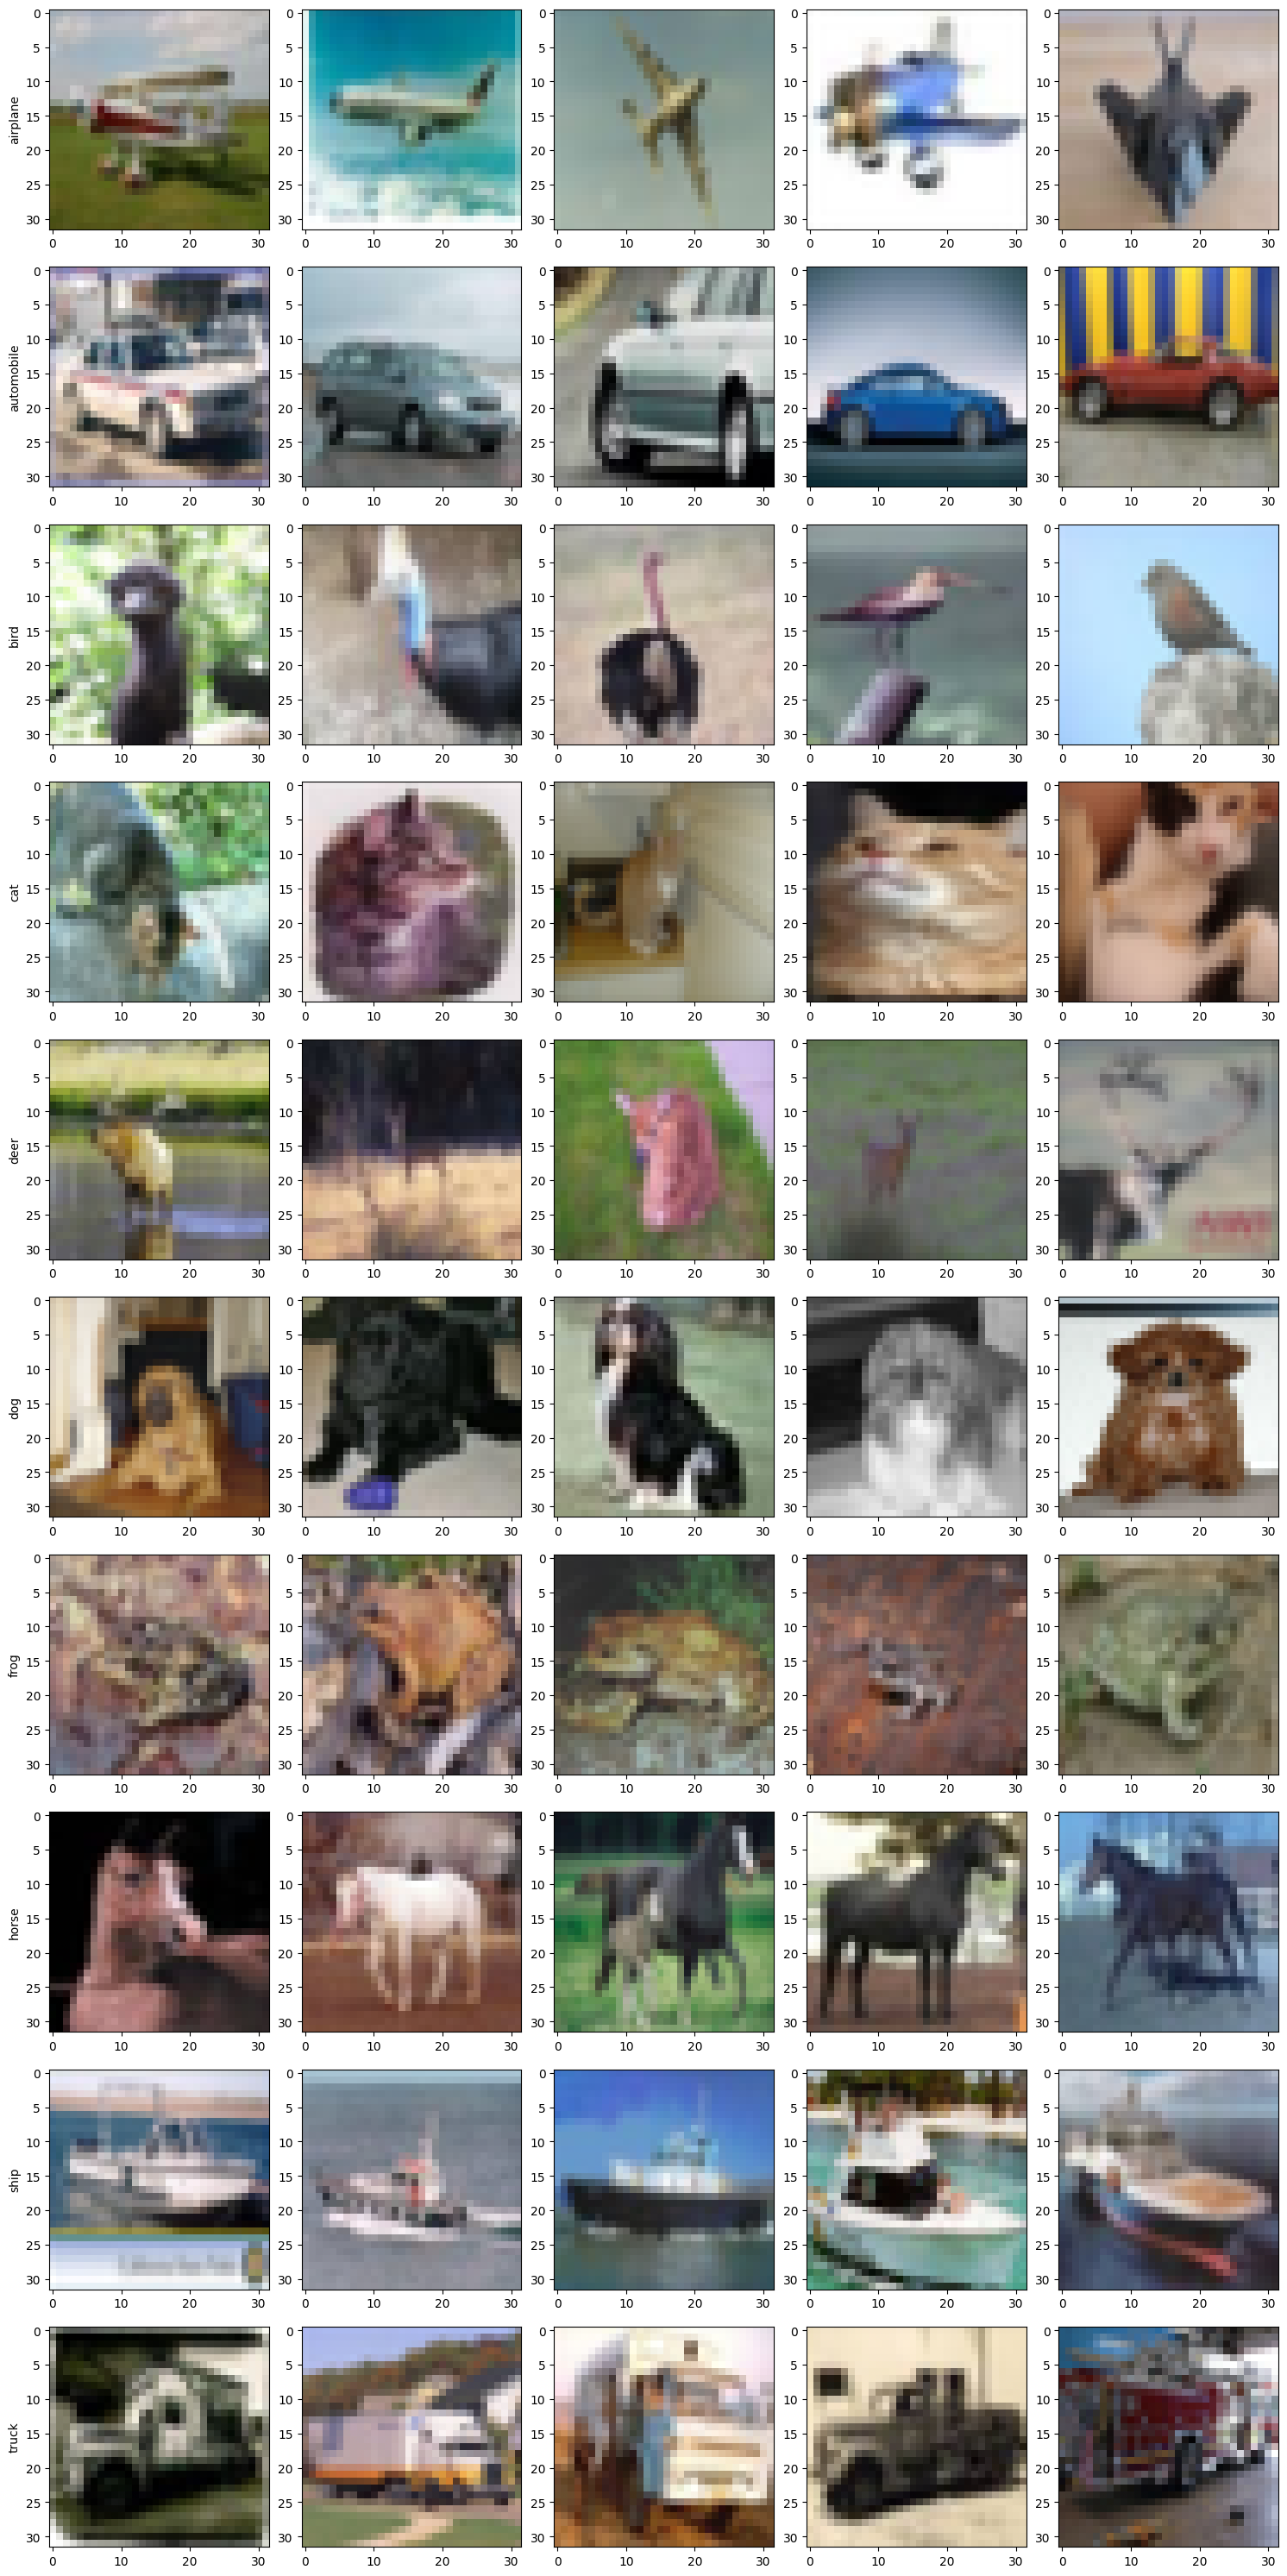

In [9]:
#Your code here

class_images = {label: [] for label in LABELS}

for i in range(len(y_dev)):
    label = LABELS[y_dev[i][0]]
    class_images[label].append(x_dev[i])

fig, axes = plt.subplots(10, 5, figsize=(15, 30))

for i, label in enumerate(LABELS):
    images = class_images[label][:50]
    for j in range(50):
        ax = axes[i, j // 10]
        ax.imshow(images[j])
        if j == 0:
            ax.set_ylabel(label)


plt.tight_layout()
plt.show()

###2.2 Preparing the dataset for NN

1) Print the shapes -  𝑥𝑑𝑒𝑣, 𝑦𝑑𝑒𝑣, 𝑥𝑡𝑒𝑠𝑡, 𝑦𝑡𝑒𝑠𝑡

2) Flatten the images into one-dimensional vectors and again print the shapes of  𝑥𝑑𝑒𝑣, 𝑥𝑡𝑒𝑠𝑡

3) Standardize the development and test sets.

4) One hot encode your labels

5) Train-test split your development set into train and validation sets (80:20 ratio).

In [10]:
#Your code here
print(f"x_dev shape: {x_dev.shape}")
print(f"y_dev shape: {y_dev.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_dev shape: (50000, 32, 32, 3)
y_dev shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [11]:
#Your code here
x_dev_flattened = x_dev.reshape(x_dev.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

print(f"Flattened x_dev shape: {x_dev_flattened.shape}")
print(f"Flattened x_test shape: {x_test_flattened.shape}")

Flattened x_dev shape: (50000, 3072)
Flattened x_test shape: (10000, 3072)


In [12]:
#Your code here
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_dev_standardized = scaler.fit_transform(x_dev_flattened)
x_test_standardized = scaler.transform(x_test_flattened)

print(f"Standardized x_dev shape: {x_dev_standardized.shape}")
print(f"Standardized x_test shape: {x_test_standardized.shape}")

Standardized x_dev shape: (50000, 3072)
Standardized x_test shape: (10000, 3072)


In [13]:
#Your code here
from tensorflow.keras.utils import to_categorical

y_dev_one_hot = to_categorical(y_dev, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

print(f"One-hot encoded y_dev shape: {y_dev_one_hot.shape}")
print(f"One-hot encoded y_test shape: {y_test_one_hot.shape}")

One-hot encoded y_dev shape: (50000, 10)
One-hot encoded y_test shape: (10000, 10)


In [14]:
#Your code here
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_dev_standardized, y_dev_one_hot, test_size=0.2, random_state=42)

print(f"x_train shape: {X_train.shape}")
print(f"x_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

x_train shape: (40000, 3072)
x_val shape: (10000, 3072)
y_train shape: (40000, 10)
y_val shape: (10000, 10)


### 2.3 Build the feed forward network with the below specifications

First layer size = 128

hidden layer size = 64

last layer size = Figure this out from the data!

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

#Your code here
model = Sequential()
model.add(Input(shape=(3072,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


###2.4 Print out the model summary. Mention the number of parameters for each layer.

In [16]:
#Your code here
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

The formula for the number of parameters for each layer is the output shape of pervious layer multiplied by output shape of current layer plus output shape of current layer.

ex) `3072*128+128 = 393,344`

###2.5 Do you think the number of parameters is dependent on the image height and width?

### Your comments here

Yes, it is. The formula for the number of parameters for each layer is the output shape of pervious layer multiplied by output shape of current layer plus output shape of current layer.

ex) `3072*128+128 = 393,344`

and the 3072 that we use here is by flattening our input image into 1D, ie, `height*width*channels = 32*32*3 = 3072`

**Printing out your model's output on first train sample. This will confirm if your dimensions are correctly set up. The sum of this output should equal to 1.**

In [17]:
#modify name of X_train based on your requirement

model.compile()
output = model.predict(X_train[0].reshape(1,-1))

print("Output: {:.2f}".format(sum(output[0])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step
Output: 1.00


###2.6 Using the right metric and  the right loss function, with Adam as the optimizer, train your model for 20 epochs.

In [18]:
#Your code here
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3307 - loss: 1.9426 - val_accuracy: 0.4177 - val_loss: 1.6511
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4461 - loss: 1.5611 - val_accuracy: 0.4414 - val_loss: 1.5722
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4871 - loss: 1.4487 - val_accuracy: 0.4594 - val_loss: 1.5329
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5146 - loss: 1.3616 - val_accuracy: 0.4698 - val_loss: 1.5041
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5426 - loss: 1.2918 - val_accuracy: 0.4747 - val_loss: 1.5018
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5569 - loss: 1.2401 - val_accuracy: 0.4814 - val_loss: 1.5016
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5791 - loss: 1.1995 - val_accuracy: 0.4920 - val_loss: 1.4990
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5942 - loss: 1.1398 - val_accuracy: 0.

###2.7 Plot the training curves as described below

#### 2.7.1 Display the train vs validation loss over each epoch


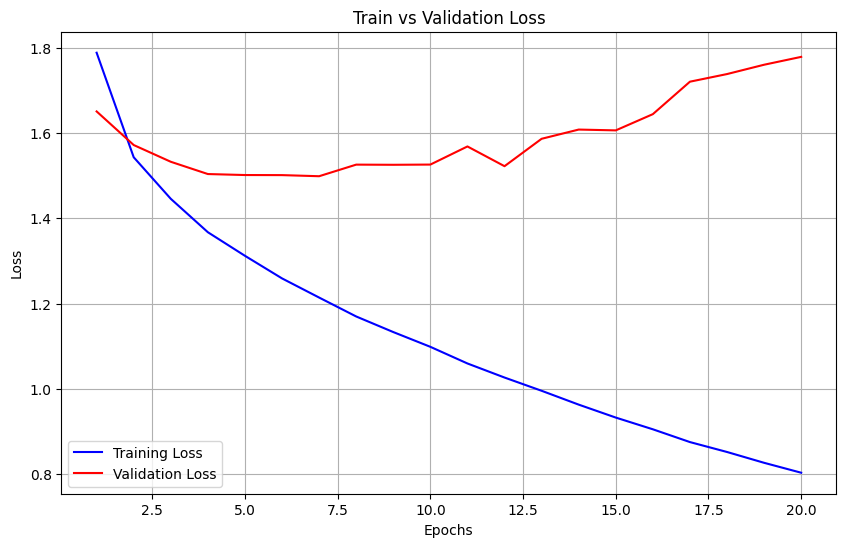

In [19]:
#Your code here
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, 21), val_loss, label='Validation Loss', color='red')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#### 2.7.2 Display the train vs validation accuracy over each epoch

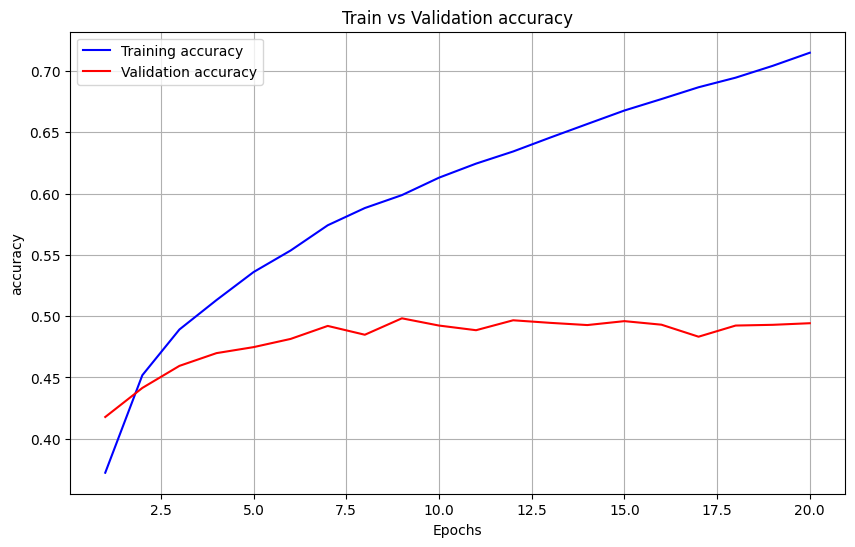

In [20]:
#Your code here
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_acc, label='Training accuracy', color='blue')
plt.plot(range(1, 21), val_acc, label='Validation accuracy', color='red')
plt.title('Train vs Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)
plt.show()

### 2.8 Finally, report the metric chosen on test set

In [21]:
#Your code here
test_loss, test_accuracy = model.evaluate(x_test_standardized, y_test_one_hot)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5013 - loss: 1.7618
Test Accuracy: 0.4971
Test Loss: 1.7764


### 2.9 Plot the first 50 samples of test dataset on a 10*5 subplot and this time label the images with both the ground truth (GT) and predicted class (P). (Make sure you predict the class with the improved model)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


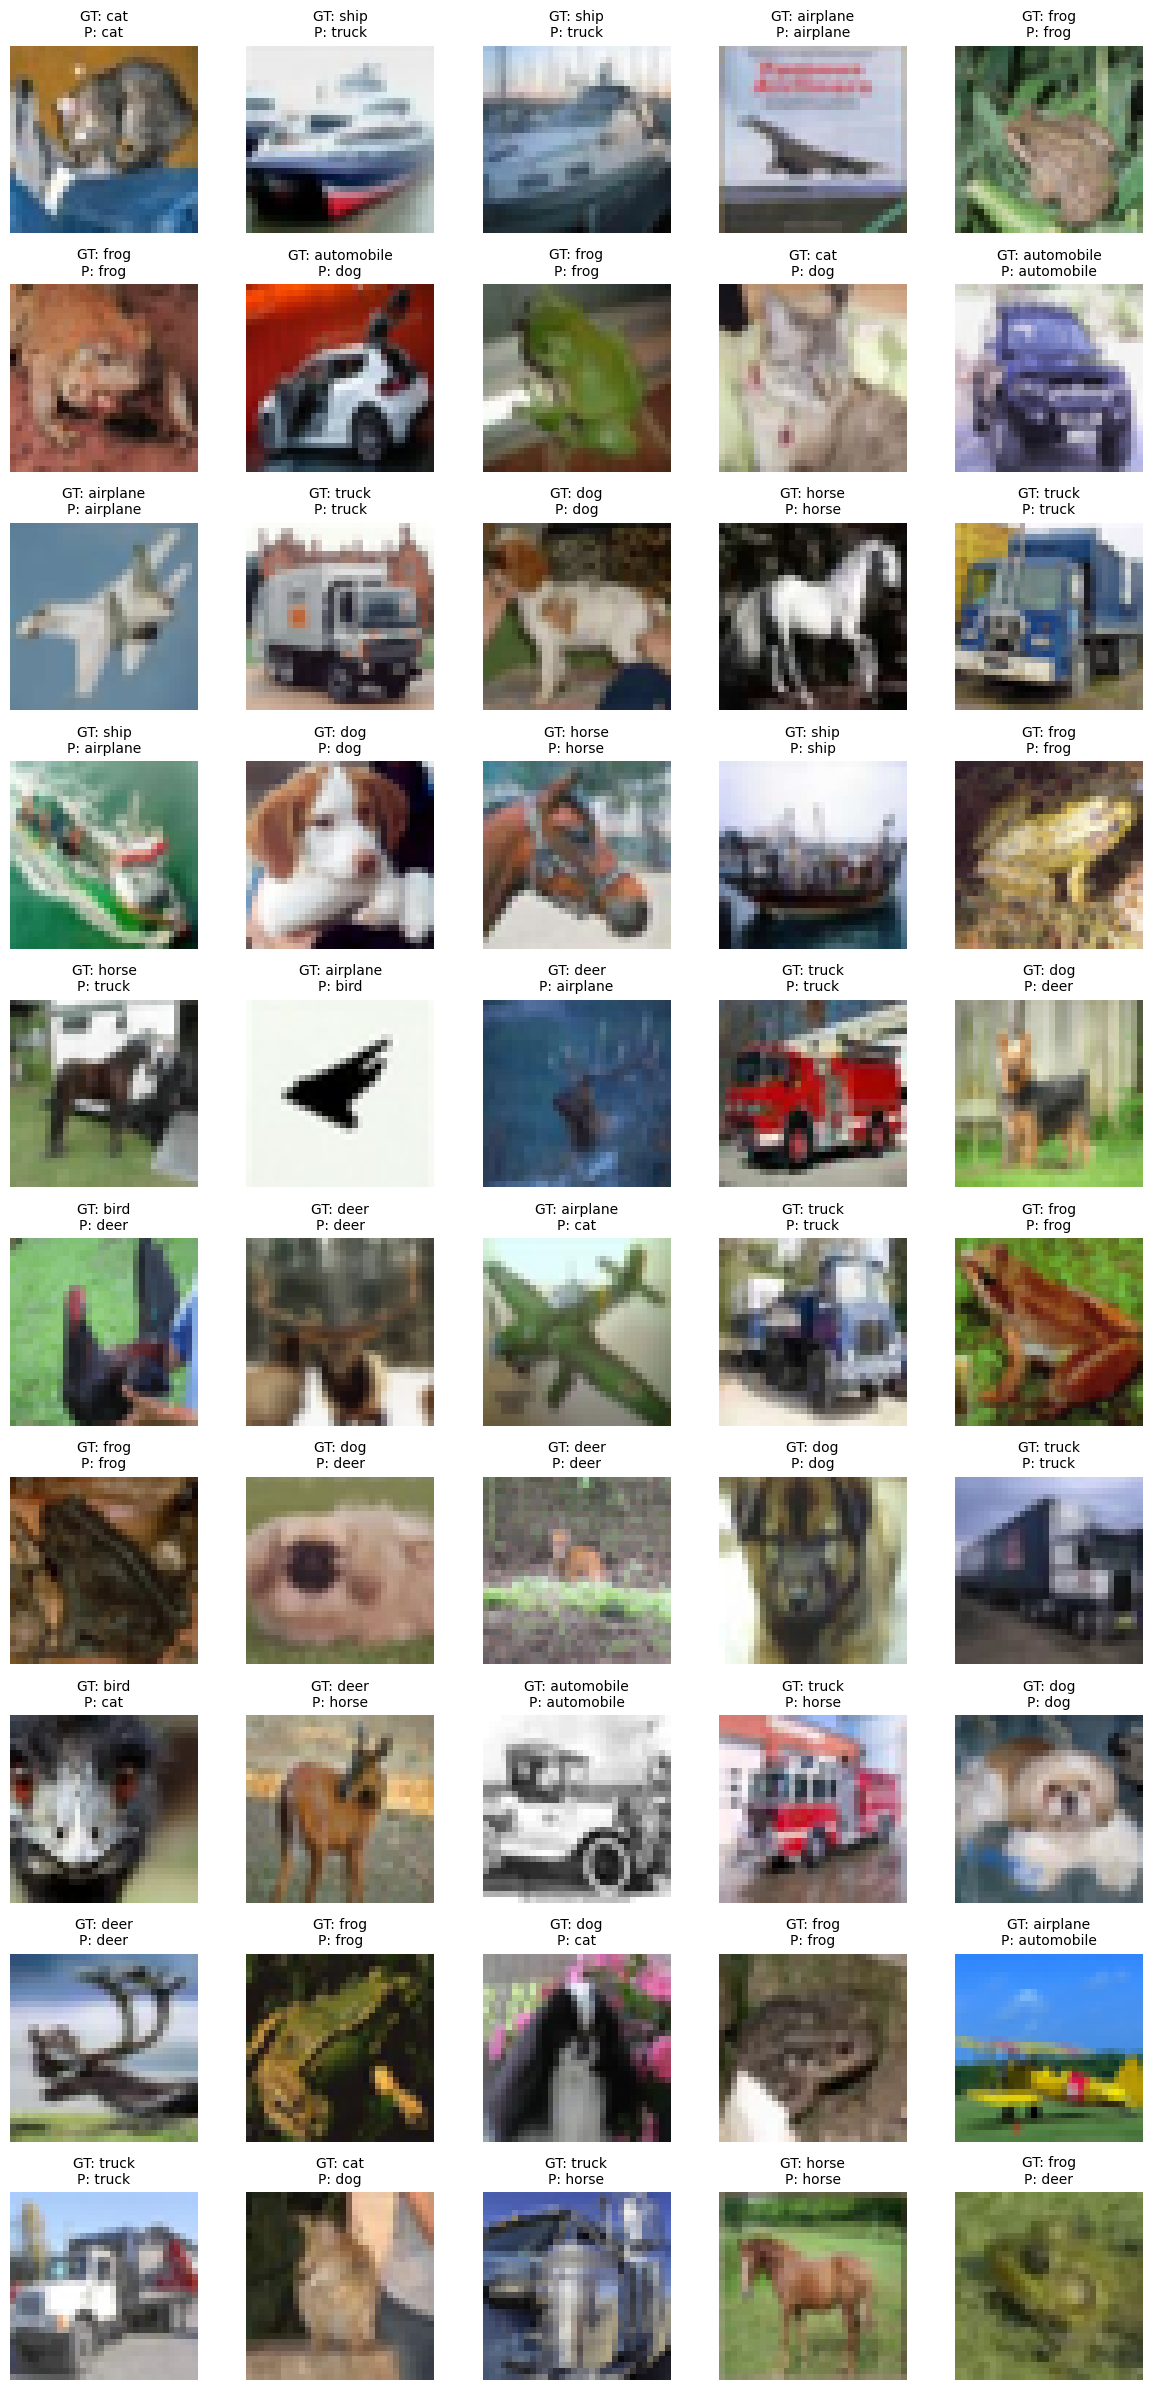

In [22]:
#Your code here
y_pred = model.predict(x_test_standardized)
y_pred_class = np.argmax(y_pred, axis=1)

y_test_class = np.argmax(y_test_one_hot, axis=1)

fig, axes = plt.subplots(10, 5, figsize=(12, 24))

for i in range(50):
    ax = axes[i // 5, i % 5]
    ax.imshow(x_test[i])
    gt = y_test_class[i]
    pred = y_pred_class[i]
    ax.set_title(f"GT: {LABELS[gt]}\nP: {LABELS[pred]}", fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Part 3 - Convolutional Neural Networks

In this part of the homework, we will build and train a classical convolutional neural network on the CIFAR Dataset

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [24]:
#Code to load the dataset - Do not change
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()
print("x_dev: {},y_dev: {},x_test: {},y_test: {}".format(x_dev.shape, y_dev.shape, x_test.shape, y_test.shape))

x_dev, x_test = x_dev.astype('float32'), x_test.astype('float32')
x_dev = x_dev/255.0
x_test = x_test/255.0


from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_dev, y_dev,test_size = 0.2, random_state = 42)

x_dev: (50000, 32, 32, 3),y_dev: (50000, 1),x_test: (10000, 32, 32, 3),y_test: (10000, 1)


### 3.1 We will be implementing one of the first CNN models put forward by Yann LeCunn, which is commonly referred to as LeNet-5. The network has the following layers:

1) 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1 and padded to yield the same size as input, ReLU activation

2) Maxpooling layer of 2x2

3) 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation

4) Maxpooling layer of 2x2

5) Flatten the convolution output to feed it into fully connected layers

6) A fully connected layer with 120 units, ReLU activation

7) A fully connected layer with 84 units, ReLU activation

8) The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)

In [25]:
#Your code here
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))



### 3.2 Report the model summary

In [26]:
#Your code here
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │          69,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,126 (324.71 KB)

 Trainable params: 83,126 (324.71 KB)

 Non-trainable params: 0 (0.00 B)

### 3.3 Model Training

1) Train the model for 20 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets.

2) Plot separate plots for:

* displaying train vs validation loss over each epoch
* displaying train vs validation accuracy over each epoch

3) Report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [27]:
#Your code here
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3161 - loss: 1.8838 - val_accuracy: 0.4493 - val_loss: 1.5042
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4676 - loss: 1.4586 - val_accuracy: 0.5013 - val_loss: 1.3720
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5244 - loss: 1.3124 - val_accuracy: 0.5476 - val_loss: 1.2612
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5623 - loss: 1.2172 - val_accuracy: 0.5735 - val_loss: 1.2061
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5987 - loss: 1.1279 - val_accuracy: 0.5845 - val_loss: 1.1711
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6177 - loss: 1.0807 - val_accuracy: 0.5920 - val_loss: 1.1607
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6414 - loss: 1.0210 - val_accuracy: 0.6087 - val_loss: 1.1123
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6582 - loss: 0.9658 - val_accuracy: 0.

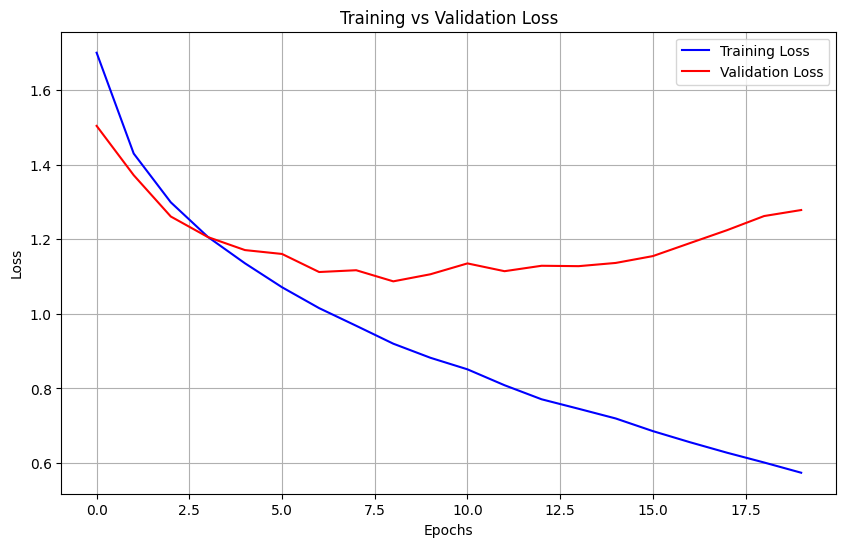

In [28]:
#Your code here
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

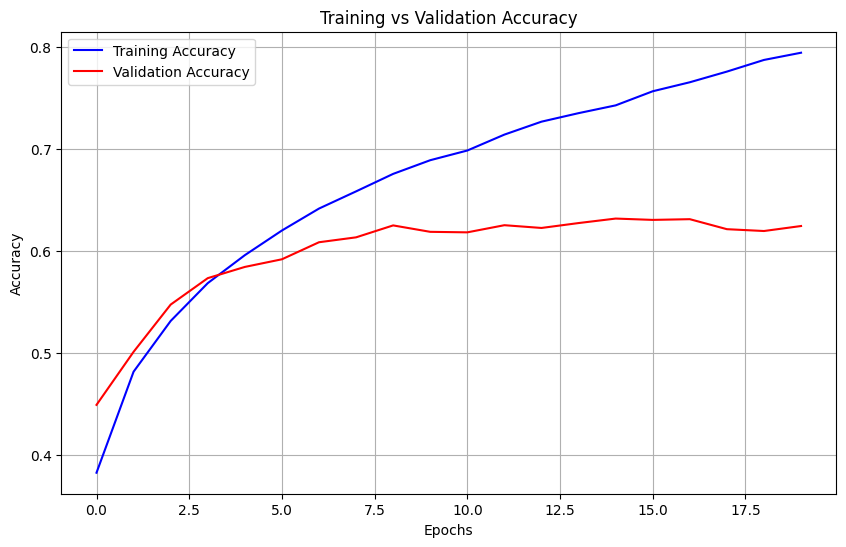

In [29]:
#Your code here
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6209 - loss: 1.2949
Test Loss: 1.2973
Test Accuracy: 0.6221


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


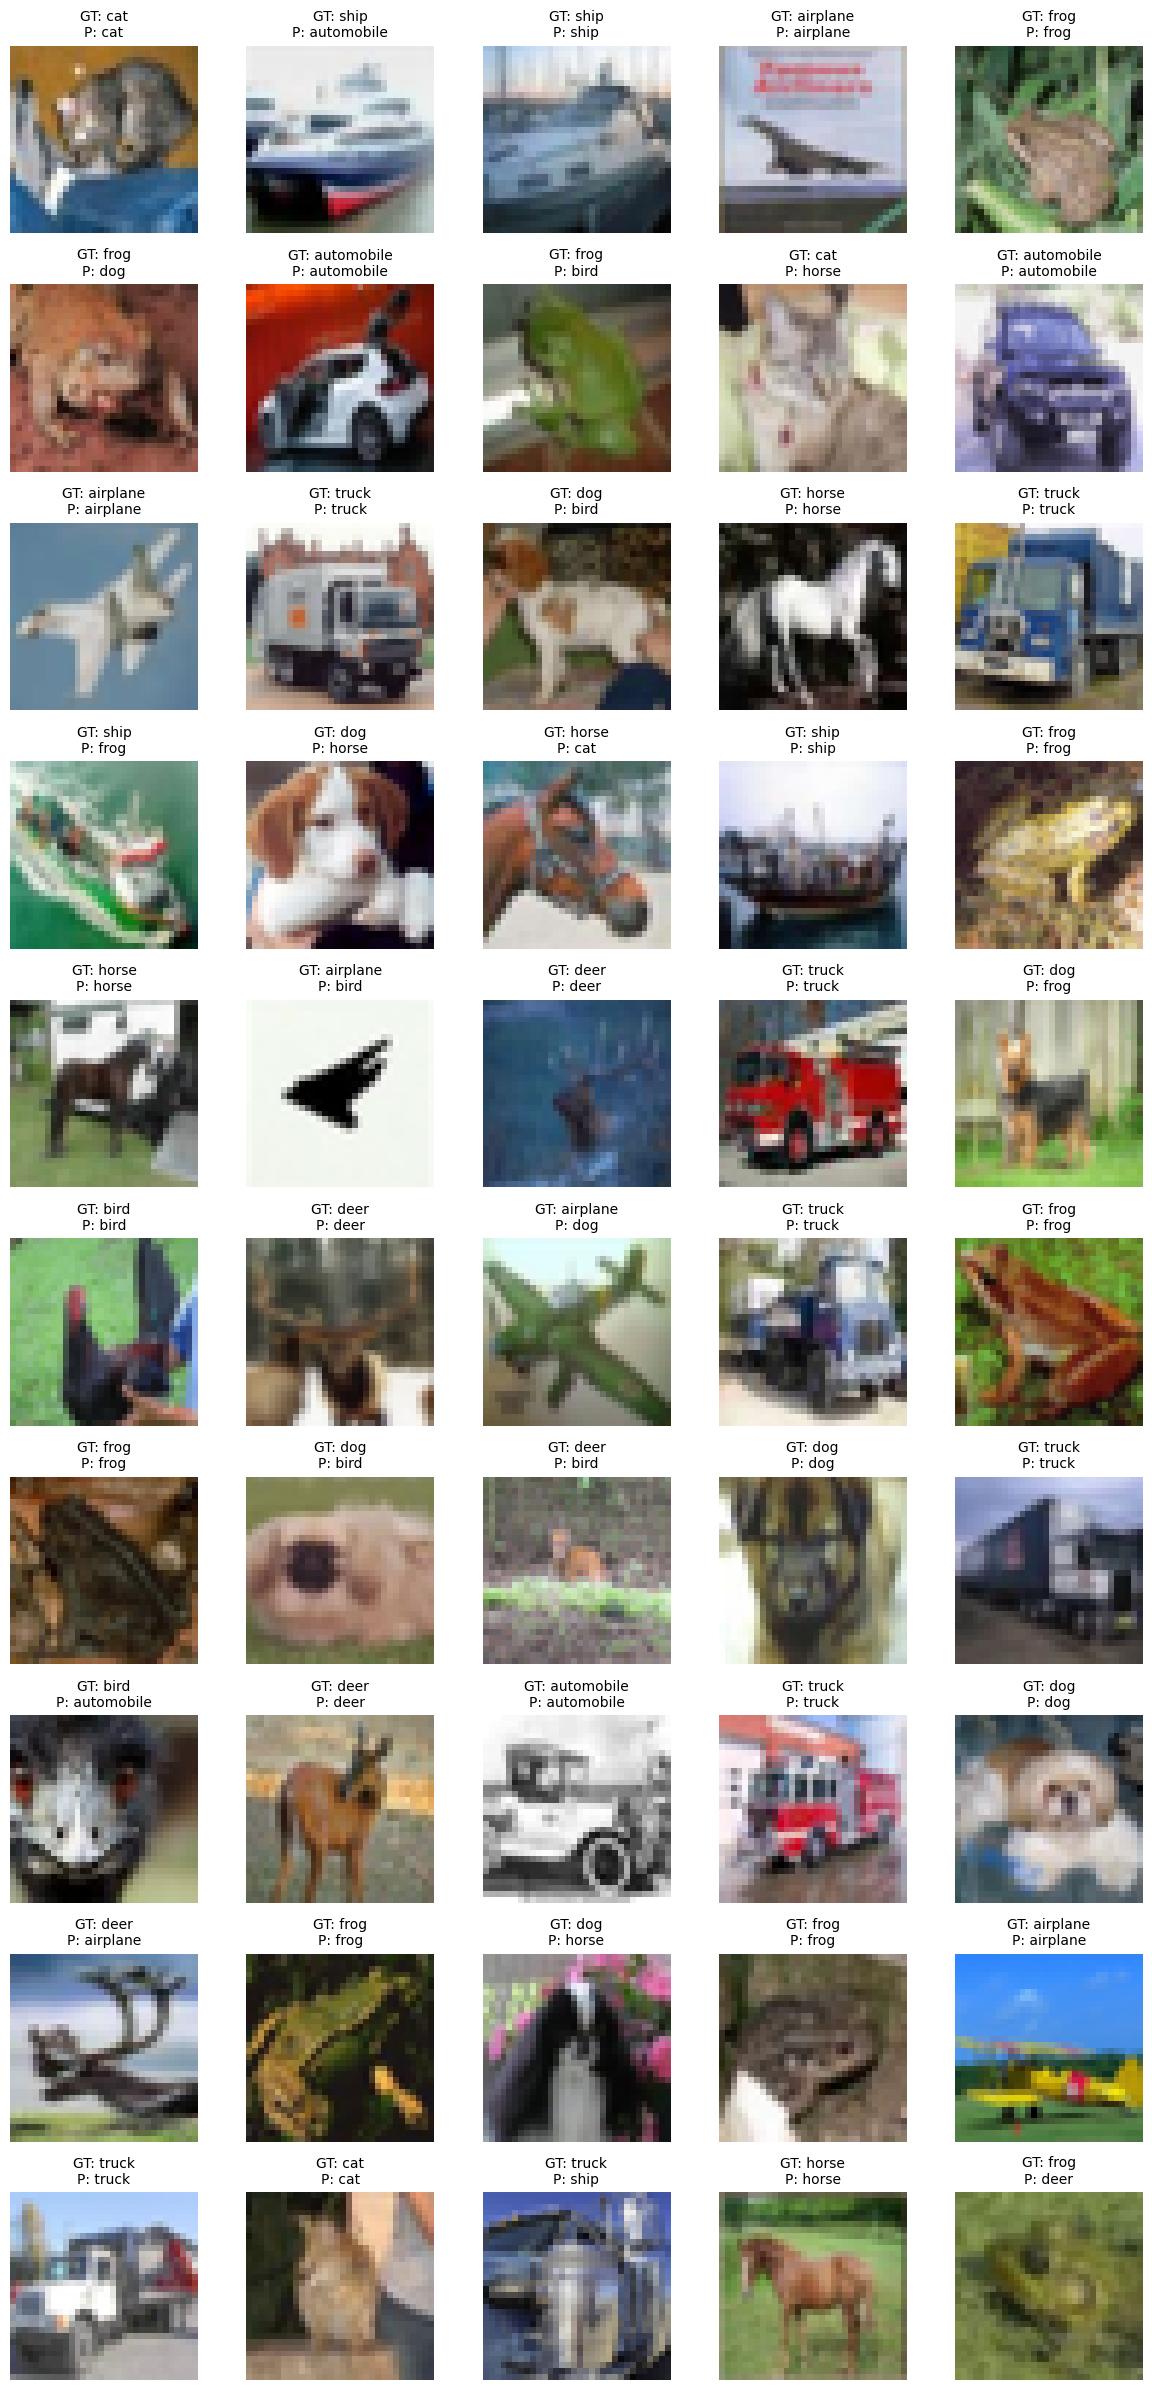

In [31]:
#Your code here
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)

y_test_class = np.argmax(y_test, axis=1)

fig, axes = plt.subplots(10, 5, figsize=(12, 24))

for i in range(50):
    ax = axes[i // 5, i % 5]
    ax.imshow(x_test[i])
    gt = y_test_class[i]
    pred = y_pred_class[i]
    ax.set_title(f"GT: {LABELS[gt]}\nP: {LABELS[pred]}", fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

### 3.4 Overfitting
1) To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.3. Train the model again for 20 epochs. Report model performance on test set.

Plot separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch

2) This time, let's apply a batch normalization after every hidden layer, train the model for 20 epochs, report model performance on test set as above.

Plot separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch

3) Compare batch normalization technique with the original model and with dropout, which technique do you think helps with overfitting better?

#### 3.4.1 Dropout

In [32]:
#Your code here
from tensorflow.keras.layers import Dropout

model_with_dropout = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    Dropout(0.3),
    tf.keras.layers.Dense(84, activation='relu'),
    Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_with_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_with_dropout = model_with_dropout.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.2538 - loss: 2.0198 - val_accuracy: 0.4262 - val_loss: 1.5727
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4055 - loss: 1.6354 - val_accuracy: 0.4777 - val_loss: 1.4452
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4487 - loss: 1.5159 - val_accuracy: 0.5038 - val_loss: 1.3712
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4836 - loss: 1.4402 - val_accuracy: 0.5294 - val_loss: 1.3088
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5109 - loss: 1.3585 - val_accuracy: 0.5364 - val_loss: 1.2908
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5319 - loss: 1.3048 - val_accuracy: 0.5470 - val_loss: 1.2594
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5462 - loss: 1.2656 - val_accuracy: 0.5651 - val_loss: 1.2047
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5636 - loss: 1.2192 - val_accuracy: 0.

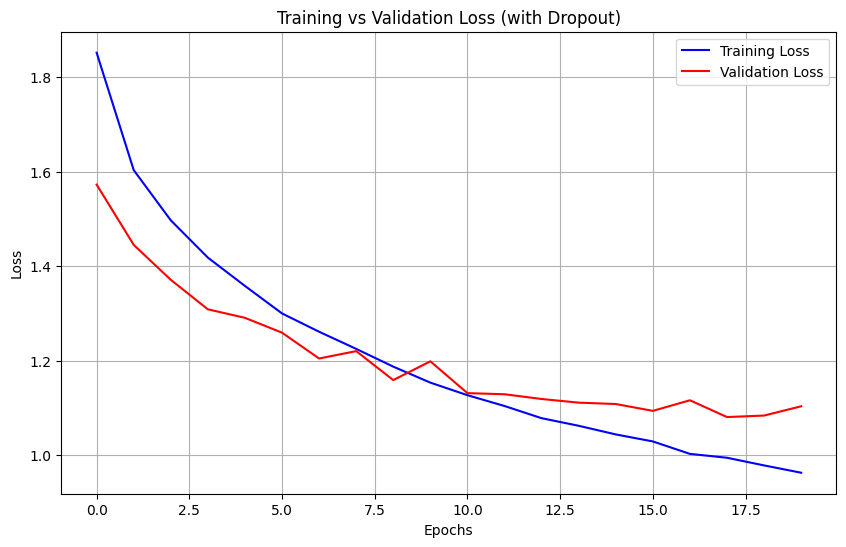

In [33]:
#Your code here
plt.figure(figsize=(10, 6))
plt.plot(history_with_dropout.history['loss'], label='Training Loss', color='blue')
plt.plot(history_with_dropout.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training vs Validation Loss (with Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

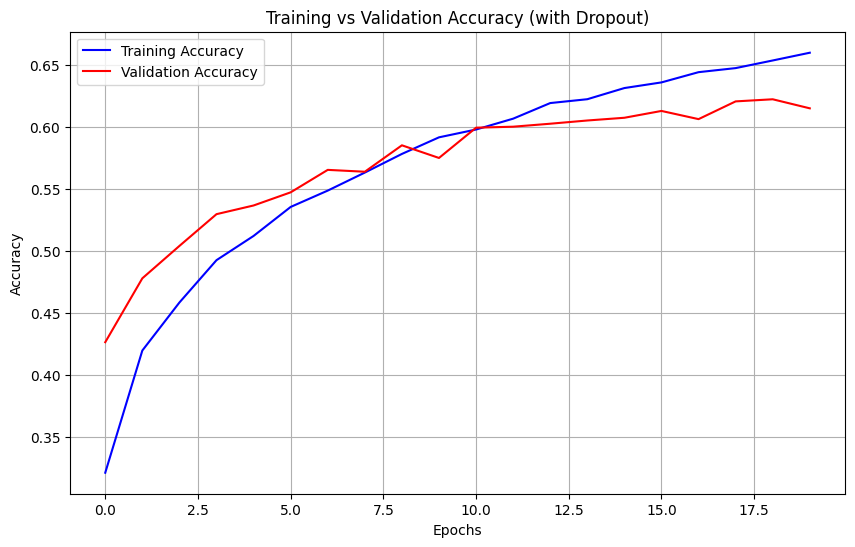

In [34]:
#Your code here
plt.figure(figsize=(10, 6))
plt.plot(history_with_dropout.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_with_dropout.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training vs Validation Accuracy (with Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
test_loss, test_accuracy = model_with_dropout.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6170 - loss: 1.0943
Test Loss: 1.0940
Test Accuracy: 0.6198


#### 3.4.2 Batch Normalization

In [36]:
#Your code here
from tensorflow.keras.layers import BatchNormalization

model_with_batch_norm = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Dense(84, activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_with_batch_norm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_with_batch_norm = model_with_batch_norm.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.3859 - loss: 1.7551 - val_accuracy: 0.4951 - val_loss: 1.3929
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5496 - loss: 1.2615 - val_accuracy: 0.4899 - val_loss: 1.4803
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6147 - loss: 1.0951 - val_accuracy: 0.5732 - val_loss: 1.2073
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6552 - loss: 0.9825 - val_accuracy: 0.5820 - val_loss: 1.2248
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6802 - loss: 0.9100 - val_accuracy: 0.6117 - val_loss: 1.1139
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7086 - loss: 0.8284 - val_accuracy: 0.6137 - val_loss: 1.1256
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7305 - loss: 0.7724 - val_accuracy: 0.6346 - val_loss: 1.0765
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7469 - loss: 0.7143 - val_accuracy: 0.

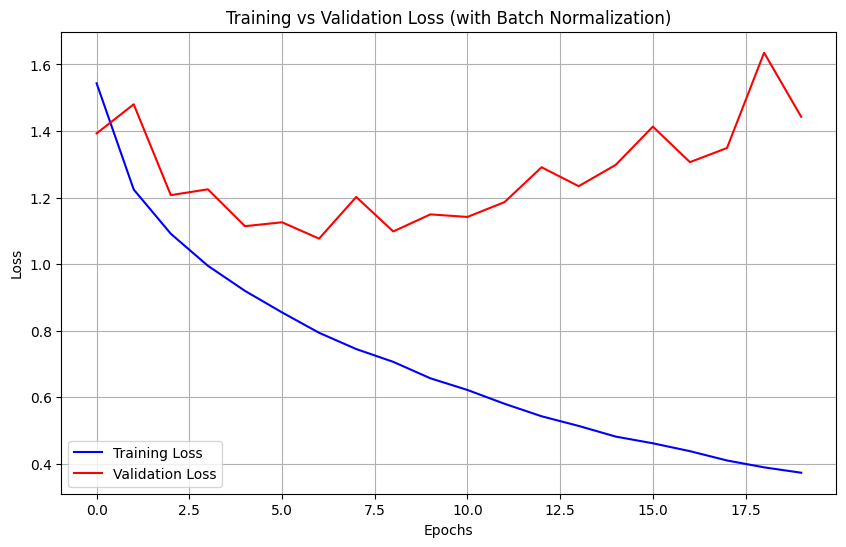

In [37]:
#Your code here
plt.figure(figsize=(10, 6))
plt.plot(history_with_batch_norm.history['loss'], label='Training Loss', color='blue')
plt.plot(history_with_batch_norm.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training vs Validation Loss (with Batch Normalization)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

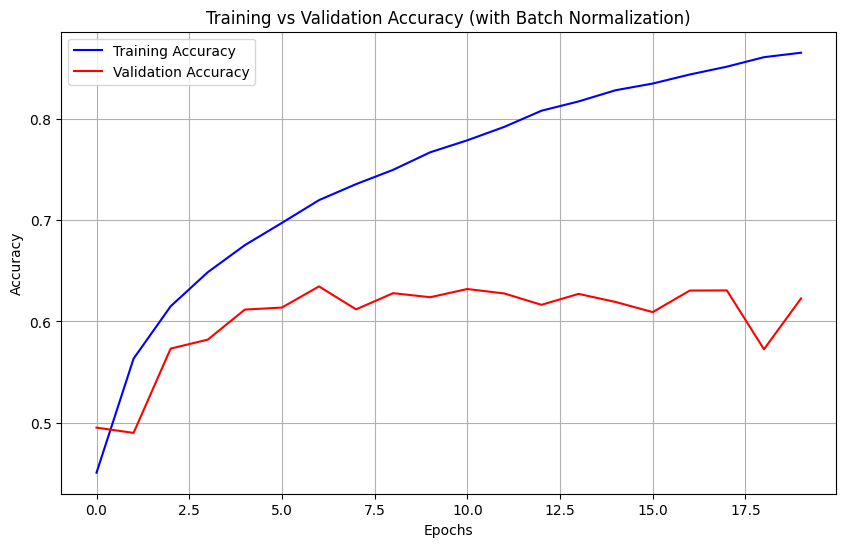

In [38]:
#Your code here
plt.figure(figsize=(10, 6))
plt.plot(history_with_batch_norm.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_with_batch_norm.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training vs Validation Accuracy (with Batch Normalization)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
test_loss, test_accuracy = model_with_batch_norm.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6169 - loss: 1.4261
Test Loss: 1.4513
Test Accuracy: 0.6154


### Your comments here


Dropout is a regularization technique that randomly drops a fraction of neurons during training, forcing the model to generalize better. It helps prevent overfitting, especially when the model has too many parameters and the dataset is relatively small. On the other hand, Batch normalization normalizes the activations, which helps the model converge faster and can lead to better generalization. It has the additional advantage of sometimes improving training speed and stability, but it may not always reduce overfitting as effectively as dropout.

Based on the results - accuracy and loss, although the train accuracy of the model using Batch Normalization is more compared to Dropout, it doesn't solve the problem that we are trying to solve - Overfitting, if anything it worsens the problem because in for the original model the training accuracy was only around 81% but for Batch Normalization its around 88% and the test and validation accuracy being around the same..

Hence, I'd prefer Dropout eventhough it doesn't work very good and has lesser train accuracies than Batch Normalization and Original models but comparitively better (test accuracy) than that of Batch Normalization's and it solves the overfitting problem.